# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса по операциям с недвижимостью — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# 1. Изучение общей информации и предобработка данных.

## 1.1. Изучение данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

## 1.2. Работа с пропуками.

- *Пропуски в стобцах с информацией о балконах, ближайших парках, прудах, аэропортах могли появится по причине их фактичесого отсутствия. Данные пропуски можем заполнить нулями. Тип недвижимости "апартаменты" мог быть незаполнен по той же причине.*

In [4]:
#заполняем пропуски, проверяем результат
df['balcony'] = df['balcony'].fillna('0')
df['is_apartment'] = df['is_apartment'].fillna(False)
df.loc[:, 'parks_around3000': 'ponds_nearest'] = df.loc[:, 'airports_nearest': 'ponds_nearest'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null object
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3000

- Значения высоты потолков одни из необходимых для составления выводов,по этому они обязательны к заполнению.
- Т.к. малоэтажные здания в общем случае имеют большую высоту потолков, чем высокоэтажные, то группируем дома по этажности здания как мало-,средне-,высоко-,многоэтажные и высотные.

In [5]:
#для верхней границы высотных зданий взял значение 60, т.к. в таблице отсутствуют значения больше
def group(row):
    if row < 3:
        return '1-2'
    if row < 6:
        return '3-5'
    if row < 11:
        return '6-10'
    if row < 17:
        return '11-16'
    if row > 16:
        return '16-60'
df['building_group'] = df['floors_total'].apply(group)
#применяем функцию
df['ceiling_height'] = df.groupby('building_group')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))
#для удобства дальнейших расчетов округляем высоту потолков
df['ceiling_height'] = (df['ceiling_height']).round(decimals=2)

- По аналогии с высотой потолков заполняем столбцы жилой площади и площади кухни

In [6]:
df['living_area'] = df.groupby(['building_group', 'rooms'])['living_area'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [7]:
df['kitchen_area'] = df.groupby(['building_group', 'rooms'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [8]:
#проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23612 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23418 non-null float64
balcony                 23699 non-null object
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3000

## 1.3. Работа с датой и временем.

- Столбец даты размещения объявления лучше перевести в формат datetime

In [9]:
#переводим в необходимый формат и отбрасываем время размещения
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23612 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23418 non-null float64
balcony                 23699 non-null object
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_ar

- Пропуски в столбце расстояния до центра города, скорее всего, появились вследствие большой удаленности населенного пункта, т.е. их можно оставить.

### Вывод: *получена таблица с заполненными пропусками в важных переменных и измененным типом данных на более удобный для дальнейшей работы.*

# 2. Добавление переменных в таблицу.

## 2.1. Цена квадратного метра.

- *Для удобства переведем цену в миллионы*

In [10]:
df['last_price'] = (df['last_price']/1000000).round(decimals=2)

In [11]:
df['price_m'] = (df['last_price']/df['total_area']).round(decimals=3)

## 2.2. Группировка по этажу.

In [12]:
df.loc[df['floor'] == df['floors_total'], 'floor_group'] = 'last'
df.loc[df['floor'] == 1, 'floor_group'] = 'first'
df['floor_group'] = df['floor_group'].fillna('other')

## 2.3. День недели, месяц, год публикации.

In [13]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.strftime('%b')
df['year'] = df['first_day_exposition'].dt.strftime('%Y')

## 2.4. Отношение жилой площади, площади кухни к общей.

In [14]:
df['living_total'] = df['living_area']/df['total_area']
df['kitchen_total'] = df['kitchen_area']/df['total_area']

In [15]:
#проверяем результат
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,building_group,price_m,floor_group,weekday,month,year,living_total,kitchen_total
0,20,13.00,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,11-16,0.120,other,3,Mar,2019,0.472222,0.231481
1,7,3.35,40.4,2018-12-04,1,2.71,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,11-16,0.083,first,1,Dec,2018,0.460396,0.272277
2,10,5.20,56.0,2015-08-20,2,2.84,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3-5,0.093,other,3,Aug,2015,0.612500,0.148214
3,0,64.90,159.0,2015-07-24,3,2.71,14.0,46.3,9,False,False,False,11.6,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,11-16,0.408,other,4,Jul,2015,0.291195,0.072956
4,2,10.00,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,11-16,0.100,other,1,Jun,2018,0.320000,0.410000


### Вывод: *получена таблица с заполненными пропусками в важных столбцах и измененным типом данных на более удобный для дальнейшей работы, а так же с добавленными столбцами, необходимыми для дальнейшего исследования.*

# 3. Изучение переменных.

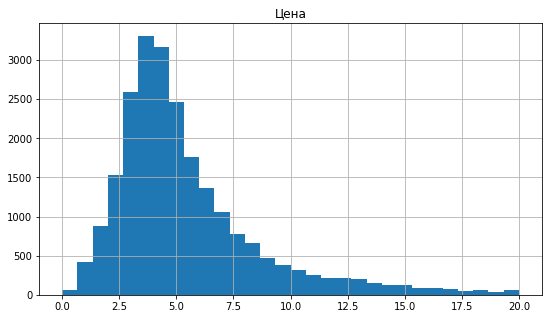

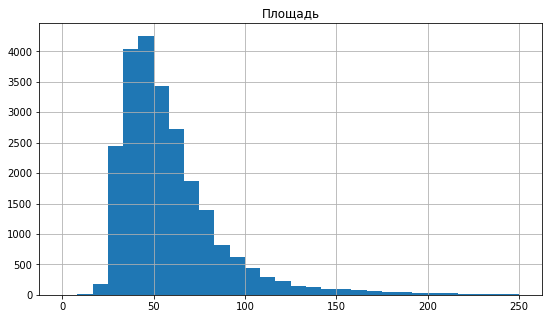

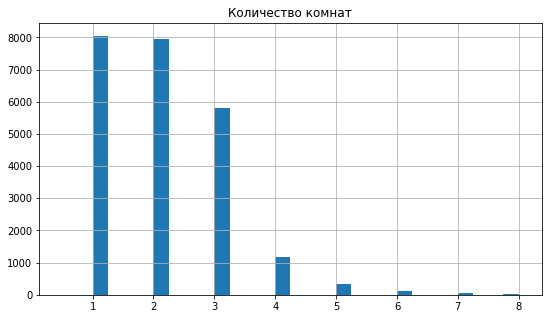

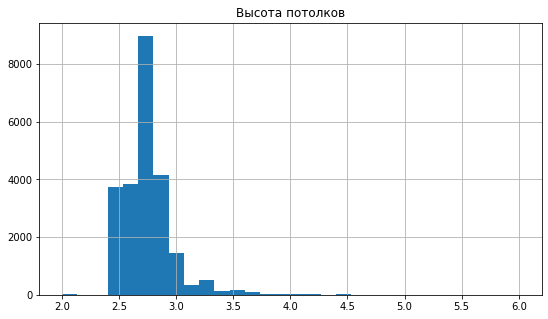

In [16]:
graph = df[['last_price', 'total_area', 'rooms', 'ceiling_height']]
ranges = [(0,20),(0,250),(0.5,8),(2,6)]
columns = ['Цена', 'Площадь', 'Количество комнат', 'Высота потолков']

for column,x,name in zip(graph,ranges,columns):
    df.hist(column ,bins = 30,  figsize = (9,5), range = x)
    plt.title(name)

- Гистограмма цены имет нормальное распределение, что так же довольно правдоподобно. Большая часть квартир имеет цену до 6.8 миллионов.
- Самые популярные квартиры имеют площадь 50 квадратных метров.
- Больше всего покупают квартиры с 1 и 2 комнатами.
- Высота потолков до 3 метров является стандартной. Высота в 3 метра может соответствовать старым малоэтажным постройкам, которых не так много.

##  3.1. Время продажи квартиры

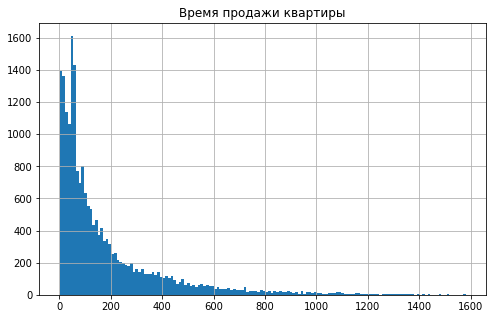

Среднее время продажи составляет 181 день.
Медианное время продажи составляет 95 день.


In [17]:
df.hist('days_exposition', bins = 150, figsize = (8,5)) 
plt.title('Время продажи квартиры')
plt.show()
print('Среднее время продажи составляет {:.0f} день.'.format(df['days_exposition'].mean()))
print('Медианное время продажи составляет {:.0f} день.'.format(df['days_exposition'].median()))

In [18]:
print(df['days_exposition'].value_counts(ascending = False).head(5))
print()
print(df['days_exposition'].describe())

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


- Исходя из гистограммы, а так же среднего и медианного времени продажи можно сделать следующие выводы:
    - среднее время продажи составляет полгода
    - большинство квартир продаются за три месяца
    - время продажи менее 45 дней и более 232 дней можно соответственно назвать очень быстрой и очень медленной продажей
    - подозрительно то, что большое количесвто квартир было продано за 7,30,45,60,90 дней, как мне кажется - это повод для 
    баг-репорта

### Выводы:
   - в основном продаются квартиры среднего метража
   - средняя цена составляет 6.5 миллиона и большет половины квартир укладываются в эту стоимость
   - больше всего объявлений о продаже одно- и двухкомнатных квартир
   - подавляющая часть квартир была продана не более чем за 232 дня

# Шаг 4. Факторы, влияющие на стоимость квартиры.

## 4.1. Общая площадь.

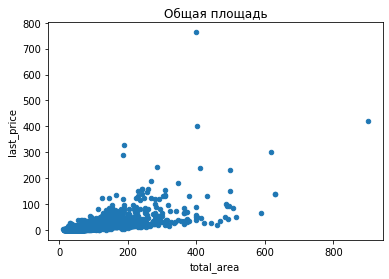

In [19]:
df.plot(x = 'total_area', y = 'last_price',kind = 'scatter')
plt.title('Общая площадь')
plt.show()

- Наблюдается слабая прямая зависимость. Больше площадь - выше цена, что вполне логично, но площадь не главный критерий ценообразования.

## 4.2. Количество комнат.

In [20]:
df.groupby('rooms')['last_price'].mean().head(12)

rooms
0      3.337868
1      3.835414
2      5.591642
3      8.179171
4     13.423542
5     23.762147
6     31.709810
7     51.470000
8     50.224167
9     34.152500
10    26.166667
11    25.250000
Name: last_price, dtype: float64

- Количество комнат имеет большее влияние, чем метраж, но только до 7 комнат.

## 4.3. Этаж (первый, последний, другой)

In [21]:
df.groupby('floor_group')['last_price'].median().sort_values(ascending = False)

floor_group
other    4.85
last     4.30
first    3.90
Name: last_price, dtype: float64

- Квартиры на первом и последнем этажах дешевле остальных.

## 4.4. Удаленность от центра.

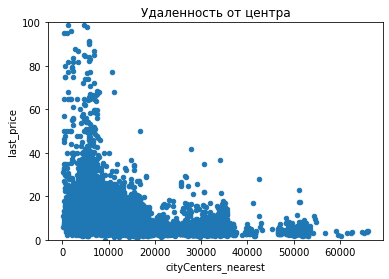

In [22]:
df.plot(x = 'cityCenters_nearest', y = 'last_price',kind = 'scatter', ylim = (0,100))
plt.title('Удаленность от центра')
plt.show()

- Квартиры ближе к центру дороже,чем на окраине города.

## 4.5. День недели.

In [23]:
#df.pivot_table(index = 'weekday', values = 'last_price',aggfunc = 'median')
df.groupby('weekday')['price_m'].mean().sort_values(ascending = False)

weekday
3    0.100162
1    0.099737
2    0.099613
0    0.099441
5    0.099022
4    0.099022
6    0.097709
Name: price_m, dtype: float64

- Явная связь между днем недели и ценой отсутствует.

## 4.5. Месяц.

In [24]:
#df.pivot_table(index = 'month', values = 'last_price',aggfunc = 'median').sort_values(by = ascending)
df.groupby('month')['price_m'].mean().sort_values(ascending = False).head(10)

month
Apr    0.101954
Sep    0.100468
Aug    0.100118
Jan    0.099865
Jul    0.099627
Dec    0.099583
Nov    0.099229
Mar    0.098969
Feb    0.098767
May    0.098549
Name: price_m, dtype: float64

- месяц размещения объявления так же слабо влияет на цену.

## 4.6. Год.

In [25]:
df.pivot_table(index = 'year', values = 'last_price',aggfunc = ('median','count'))

,count,median
year,,
2014,137,7.70
2015,1191,5.35
2016,2783,4.55
2017,8190,4.50
2018,8519,4.55
2019,2879,5.05


- 2014 год можем не учитывать по причине малого количества объявлений.
- Полученные результаты говорят о падении спроса на жилье с 2015 по 2017 и о росте цен на жилье с 2017 по 2019 год.

In [26]:
top10 = df.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10)
df.query('locality_name in @top10.index').groupby('locality_name')['price_m'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      0.114852
Пушкин               0.103119
деревня Кудрово      0.092512
посёлок Парголово    0.090141
посёлок Мурино       0.085747
посёлок Шушары       0.078698
Колпино              0.075429
Гатчина              0.068746
Всеволожск           0.068643
Выборг               0.058093
Name: price_m, dtype: float64

Получена таблица населенных пунктов с наибольшим количеством объявлений:
   - Самые высокие цены в Санкт-Петербурге
   - Самые низкие цены в Выборге

### Вывод:
   - факторы, имеющие основное влияние на конечную стоимост квартиры это количество комнат, этаж и удаленность от центра.
   - общая площадь скорее растет вместе со стоимостью, и наоборот.
   - день недели,месяц не имеют ощутимого влияния на цену.
   - цена ощутимо менялась с годами - сначала падение цен, затем рост.
   - Из топ-10 городов по количеству объявлений самые высокие цены в Санкт-Петербурге, самые низкие - в Выборге.

# 5. Исследование центра Санкт-Петербурга.

## 5.1. Выделяем центр города.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


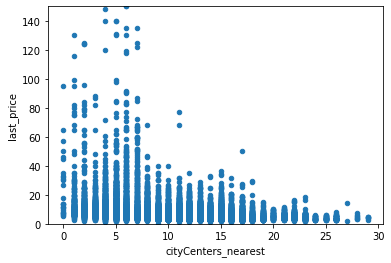

In [27]:
spb = df[df['locality_name'] == 'Санкт-Петербург']
spb['cityCenters_nearest'] = (spb['cityCenters_nearest']/1000).round()
spb.plot(x = 'cityCenters_nearest', y = 'last_price',kind = 'scatter',ylim = (0,150))
plt.show()

- По графики определяем радиус центра города, который равен 7 км.

In [28]:
#для удобства создаем отдельный датафрейм с квартирами, находящимися в центре
spb_c = spb[spb['cityCenters_nearest'] <= 7.0]
spb_c.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,building_group,price_m,floor_group,weekday,month,year,living_total,kitchen_total
3,0,64.9,159.0,2015-07-24,3,2.71,14.0,46.3,9,False,False,False,11.6,0,Санкт-Петербург,28098.0,7.0,2.0,84.0,3.0,234.0,424.0,11-16,0.408,other,4,Jul,2015,0.291195,0.072956
24,8,6.5,97.2,2015-10-31,2,2.84,3.0,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2.0,3.0,411.0,3.0,124.0,265.0,3-5,0.067,first,5,Oct,2015,0.478395,0.201646
35,6,15.5,149.0,2017-06-26,5,2.84,5.0,104.0,4,False,False,False,17.0,0,Санкт-Петербург,23670.0,4.0,0.0,0.0,1.0,779.0,644.0,3-5,0.104,other,0,Jun,2017,0.697987,0.114094
51,7,45.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,False,False,False,50.0,0,Санкт-Петербург,32537.0,7.0,0.0,0.0,3.0,99.0,541.0,6-10,0.280,other,1,Oct,2017,0.236025,0.310559
52,20,11.8,136.0,2017-09-22,6,3.00,2.0,94.0,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,7.0,1.0,526.0,0.0,0.0,NaN,1-2,0.087,last,4,Sep,2017,0.691176,0.080882


## 5.2. Исследование переменных.

### Площадь

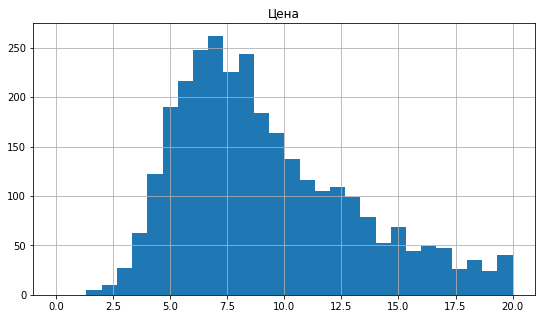

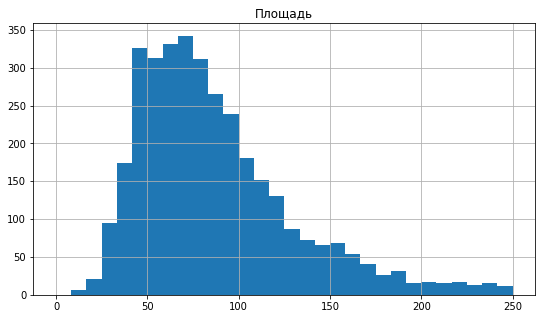

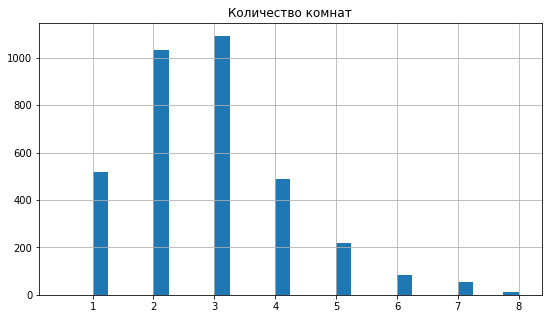

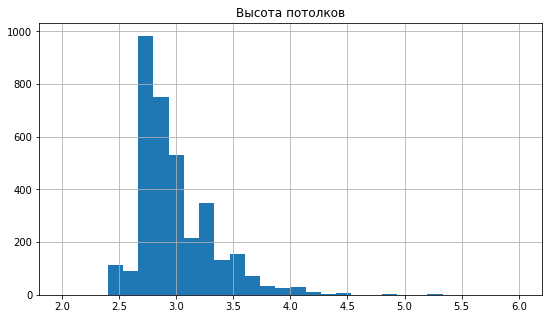

In [29]:
graph = spb_c[['last_price', 'total_area', 'rooms', 'ceiling_height']]
ranges = [(0,20),(0,250),(0.5,8),(2,6)]
columns = ['Цена', 'Площадь', 'Количество комнат', 'Высота потолков']

for column,x,name in zip(graph,ranges,columns):
    spb_c.hist(column ,bins = 30,  figsize = (9,5), range = x)
    plt.title(name)

In [30]:
#выведем описание переменных цены, метража и высоты потолков для формулирования выводов
print(spb_c['last_price'].describe())
print()
print(spb_c['total_area'].describe())
print()
print(spb_c['ceiling_height'].describe())

count    3525.000000
mean       14.895543
std        24.320912
min         1.600000
25%         6.690000
50%         9.200000
75%        14.500000
max       763.000000
Name: last_price, dtype: float64

count    3525.000000
mean       93.168641
std        59.473561
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

count    3518.000000
mean        2.998118
std         0.722520
min         2.400000
25%         2.730000
50%         2.840000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64


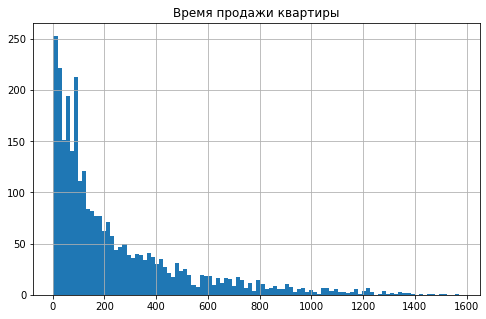

Среднее время продажи составляет 248 день.
Медианное время продажи составляет 142 день.


In [31]:
spb_c.hist('days_exposition', bins = 100, figsize = (8,5)) 
plt.title('Время продажи квартиры')
plt.show()
print('Среднее время продажи составляет {:.0f} день.'.format(spb_c['days_exposition'].mean()))
print('Медианное время продажи составляет {:.0f} день.'.format(spb_c['days_exposition'].median()))

In [32]:
print(spb_c['days_exposition'].value_counts(ascending = False).head(5))
print()
print(spb_c['days_exposition'].describe())

90.0    93
60.0    84
30.0    28
4.0     22
3.0     20
Name: days_exposition, dtype: int64

count    2941.000000
mean      247.676641
std       273.540907
min         3.000000
25%        60.000000
50%       142.000000
75%       346.000000
max      1572.000000
Name: days_exposition, dtype: float64


- средняя цена и площадь квартир в центре города заметно больше, чем в других городах.
- наличие бОльшего количества значений потолков выше 3м может говорить о бОльшем количестве малоэтажных зданий.
- больше двух-,трехкомнатных квартир, чем однокомнатных.
- большинство квартир продаются в течение года, больший срок - слишком долгая продажа.
- так же как и для всех объявлений наблюдается подозрительно большое количество продаж за срок 30,60,90 дней.

## 5.3. Факторы, влияющие на стоимость.

### Общая площадь.

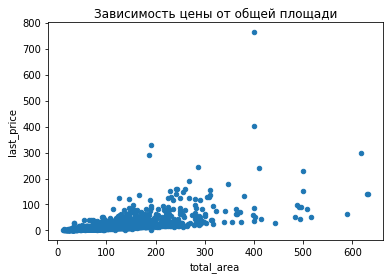

In [33]:
spb_c.plot(x = 'total_area', y = 'last_price',kind = 'scatter')
plt.title('Зависимость цены от общей площади')
plt.show()

- График схож с картиной общего датафрейма.

### Количество комнат.

In [34]:
spb_c.groupby('rooms')['last_price'].mean().head(10)

rooms
0     9.024118
1     6.843776
2     9.819574
3    14.846529
4    19.595542
5    28.735714
6    35.273133
7    51.994259
8    49.779000
9    44.666667
Name: last_price, dtype: float64

- Средняя стоимость так же увеличивается до 7 комнат.

### Этаж (первый, последний, другой).

In [35]:
spb_c.groupby('floor_group')['last_price'].median().sort_values(ascending = False)

floor_group
other    9.6
last     9.2
first    6.7
Name: last_price, dtype: float64

- Цены квартир на первом этаже заметно ниже, чем на последнем и остальных, для которых медианные значения очень близки друг к другу.

### Расстояние до центра.

In [36]:
#spb_c.plot(x = 'cityCenters_nearest', y = 'last_price',kind = 'scatter')
spb_c.groupby('cityCenters_nearest')['last_price'].median().sort_values(ascending = False)

cityCenters_nearest
0.0    17.900
1.0    11.395
2.0    10.000
5.0     9.500
4.0     9.200
6.0     8.900
3.0     8.410
7.0     7.800
Name: last_price, dtype: float64

- По таблице отчетливо заметна зависимость цены от расстояния до центра города.

### День недели.

In [37]:
spb_c.groupby('weekday')['price_m'].mean().sort_values(ascending = False)

weekday
5    0.157107
6    0.147875
3    0.144900
0    0.144254
4    0.144012
1    0.143967
2    0.142795
Name: price_m, dtype: float64

- Заметно отличаются цены объявлений размещенных в субботу.

###  Месяц.

In [38]:
spb_c.groupby('month')['price_m'].mean().sort_values(ascending = False).head(3)

month
Apr    0.155740
Dec    0.148459
Jan    0.147231
Name: price_m, dtype: float64

- Апрель - самый "дорогой" месяц.

### Год.

In [39]:
spb_c.pivot_table(index = 'year', values = 'last_price',aggfunc = ('median','count'))

,count,median
year,,
2014,27,19.800
2015,313,10.500
2016,498,9.495
2017,1261,9.000
2018,1044,8.850
2019,382,9.490


- 2014 год можно не учитывать, по причине очень малого количества объявлений.
- Падение цен схоже с остальными городами.

### Выводы:
   - зависимость цены от площади и количества комнат аналогична другим городам.
   - цена квартир на последнем этаже очень близка к цене квартир на любом этаже, кроме первого.
   - с каждым километром до центра города цена заметно растет.
   - отсутствует тенденция к росту цен на квартиры, которая заметна для всех объявлений в целом.

# 6. Общий вывод.

- проведена работа по предобработке исходных данных, а именно заполнение пустых значений, добавление переменных, необходимых для дальнейшего анализа, изменение типа данных.
- изучены переменные для всех объявлений, а именно; площадь, цена, количество комнат, высота потолков и сделаны промежуточные выводы:
   - *в основном продаются квартиры среднего метража.*
   - *средняя цена составляет 6.5 миллиона и больше половины квартир укладываются в эту стоимость.*
   - *больше всего объявлений о продаже одно- и двухкомнатных квартир.*
   - *подавляющая часть квартир была продана не более чем за 232 дня.*
- определены факторы, имеющие сильное влияние на конечную стоимость, а именно: количество комнат, этаж, удаленность от центра.
- центр города имеет несколько другие переменные:
    - *выше цена.*
    - *выше потолки.*
    - *больше общая площадь.*
    - *чаще встречаются двух-,трехкомнатные квартиры.*
    - *время продажи заметно больше, чем для остальных городов.*
- факторы, имеющие наибольшее влияние на цену для центра города те же,что и для всех объявлений, за исключением высокой средней цены на квартиры напоследнем этаже.
- цены на квартиры в центре города заметно выше, чем на окраине, а так же в других городах. Можно сказать, что расстояние до центра города являеется доминирующим фактором для ценообразования на недвижимость.